In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
%matplotlib inline

In [113]:
df = pd.read_csv('Real estate.csv')

In [114]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### EDA (Exploratory Data Analysis):

In [115]:
df.shape

(414, 8)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
No                                        414 non-null int64
X1 transaction date                       414 non-null float64
X2 house age                              414 non-null float64
X3 distance to the nearest MRT station    414 non-null float64
X4 number of convenience stores           414 non-null int64
X5 latitude                               414 non-null float64
X6 longitude                              414 non-null float64
Y house price of unit area                414 non-null float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [117]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [118]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [119]:
df= df.drop(['No'],axis=1)

In [120]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [121]:
df = df.rename(columns={"X1 transaction date":"transaction_date"})

In [122]:
df = df.rename(columns={"X2 house age": "house_age"})

In [123]:
df = df.rename(columns = {"X3 distance to the nearest MRT station": "distance_to_nearest_station"})

In [124]:
df = df.rename(columns = {"X4 number of convenience stores": "convenience_stores"})

In [125]:
df = df.rename(columns = {"X5 latitude": "latitude"})

In [126]:
df = df.rename(columns = {"X6 longitude": "longitude"})

In [127]:
df = df.rename(columns = {"Y house price of unit area": "price"})

In [128]:
df.head()

,transaction_date,house_age,distance_to_nearest_station,convenience_stores,latitude,longitude,price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Data Visualization

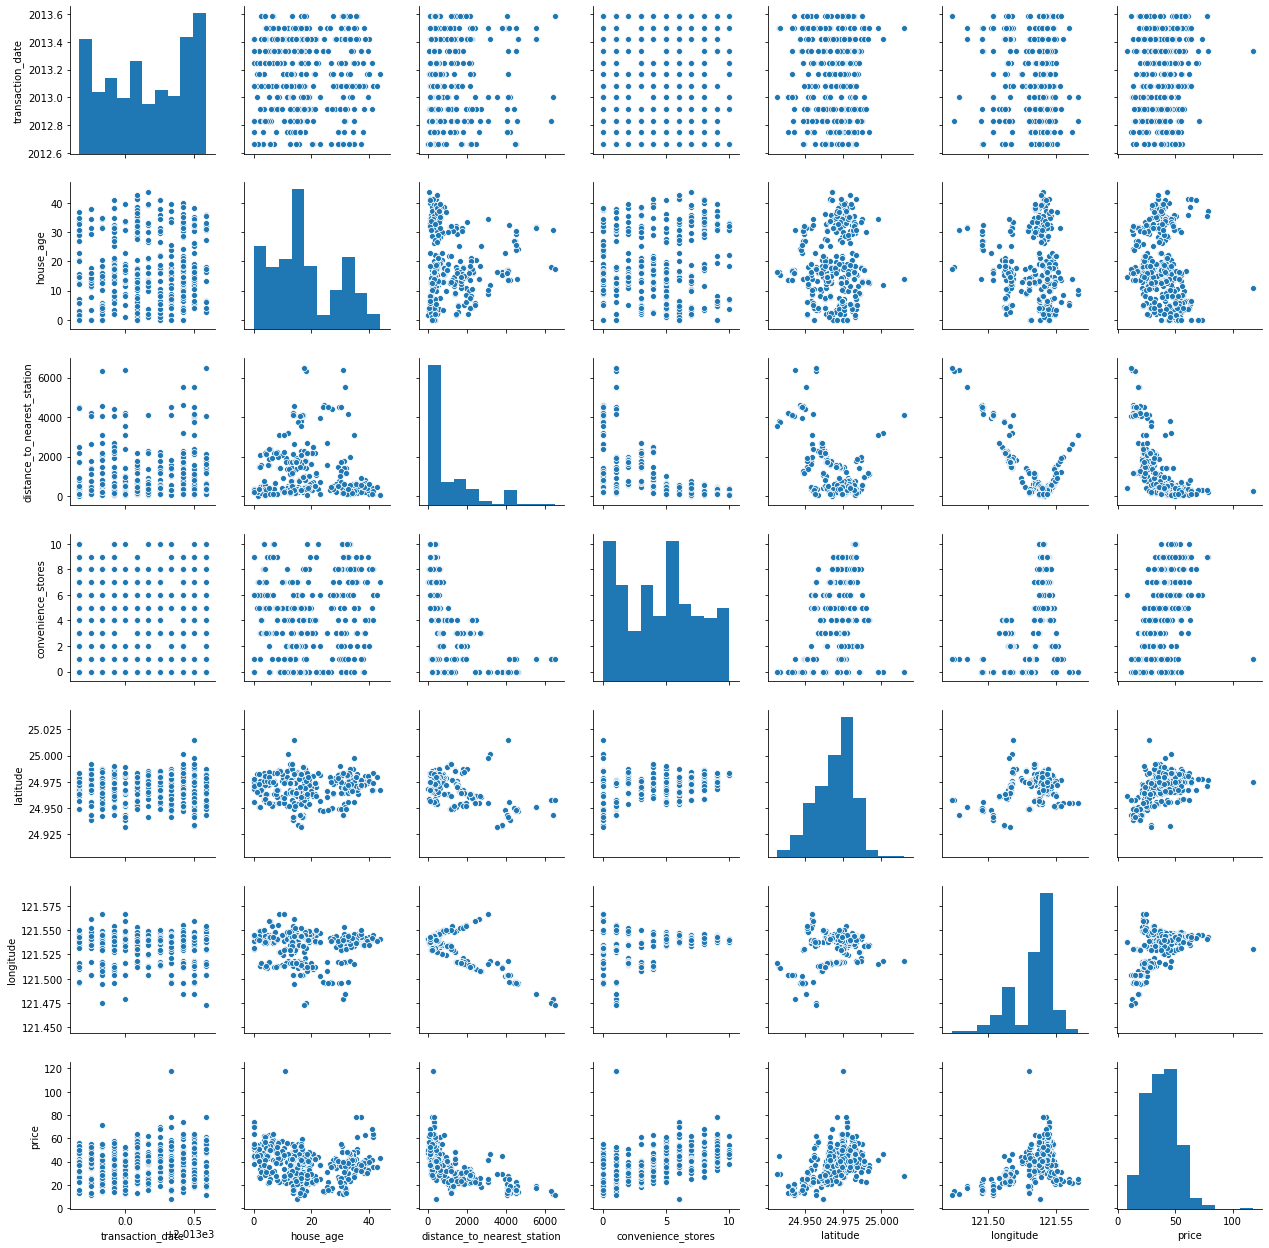

In [129]:
sns.pairplot(df)

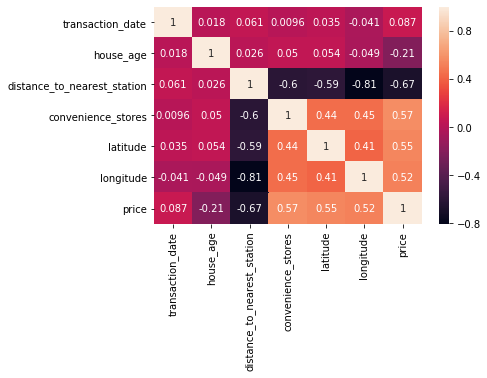

In [130]:
sns.heatmap(df.corr(),annot=True)

As, we can see that there is lot of relationship between the column 'convenience_stores','latitude','longitude'

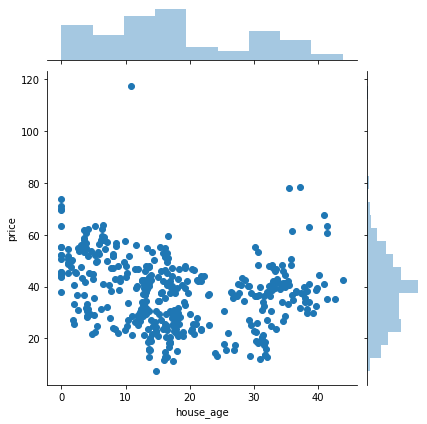

In [131]:
sns.jointplot(x='house_age',y='price',data=df)

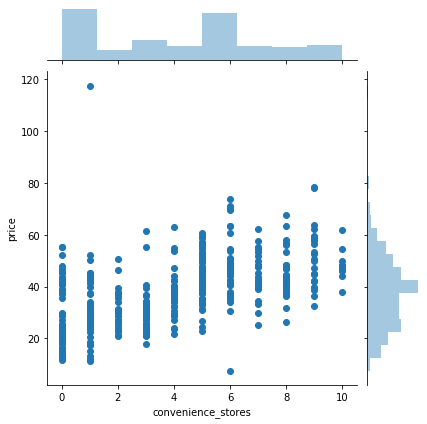

In [132]:
sns.jointplot(x='convenience_stores',y='price',data=df)

So lets use the traditional way to see which column will contribute towards the linear regression model and which are not contributing, we will discard that column.

In [133]:
# Lets say that boundary line for alpha is 0.5
# if p > alpha : so that column is not contributing to the model

from statsmodels.formula.api import ols

model=ols(formula = 'price ~ transaction_date',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3.178
Date:                Sun, 14 Mar 2021   Prob (F-statistic):             0.0754
Time:                        13:46:06   Log-Likelihood:                -1666.1
No. Observations:                 414   AIC:                             3336.
Df Residuals:                     412   BIC:                             3344.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -8461.3504   4767.669     -1.775      0.077   -1.78e+04     910.641
transaction_date     4.2219      2.368      1.783      0.075      -0.433       8.877
==============================================================================
Omnibus:                       43.013   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.373
Skew:                           0.568   Prob(JB):                     8.74e-21
Kurtosis:                       5.016   Cond. No.                     1.44e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Since p > |t| for the first column 'transaction_date' is greather than 0.5. So, lets discard that column, as it is not contributing to the model. 

Lets go on adding the other column to see their contribution in the model

In [134]:
model = ols(formula = 'price ~ house_age+distance_to_nearest_station+convenience_stores+longitude+latitude',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     108.7
Date:                Sun, 14 Mar 2021   Prob (F-statistic):           9.34e-73
Time:                        13:46:07   Log-Likelihood:                -1492.4
No. Observations:                 414   AIC:                             2997.
Df Residuals:                     408   BIC:                             3021.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -4945.5951   6211.157     -0.796      0.426   -1.72e+04    7264.269
house_age                      -0.2689      0.039     -6.896      0.000      -0.346      -0.192
distance_to_nearest_station    -0.0043      0.001     -5.888      0.000      -0.006      -0.003
convenience_stores              1.1630      0.190      6.114      0.000       0.789       1.537
longitude                      -7.8055     49.149     -0.159      0.874    -104.422      88.811
latitude                      237.7672     44.948      5.290      0.000     149.409     326.126
==============================================================================
Omnibus:                      240.068   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3748.747
Skew:                           2.129   Prob(JB):                         0.00
Kurtosis:                      17.114   Cond. No.                     2.35e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Lets try some feature engineering ideas here. Lets multiply longitude and latitude column

In [135]:
df.drop(columns=['transaction_date'],axis=1,inplace=True)

In [136]:
df['latitude']=df['latitude'] * df['longitude']

In [137]:
df.drop(columns=['longitude'],axis=1,inplace=True)

In [138]:
df.head()

,house_age,distance_to_nearest_station,convenience_stores,latitude,price
0,32.0,84.87882,10,3036.437385,37.9
1,19.5,306.59470,9,3036.098283,42.2
2,13.3,561.98450,5,3037.073589,47.3
3,13.3,561.98450,5,3037.073589,54.8
4,5.0,390.56840,5,3036.053829,43.1


Now, lets us see the co-relation between the dataset

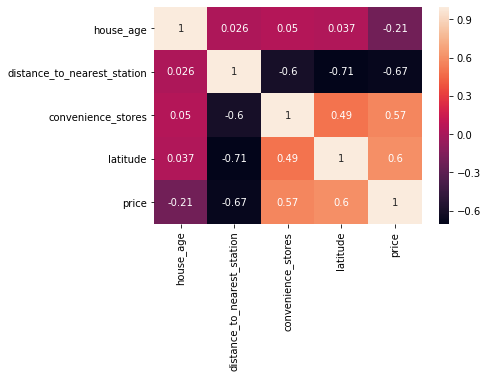

In [139]:
sns.heatmap(df.corr(),annot=True)

### Train and Test Split

In [153]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1] # independent features
y = df.iloc[:,-1] # dependent features

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [154]:
X.shape

(414, 4)

In [155]:
y.shape

(414,)

### Data modelling and Evalution

In [156]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [159]:
# Now lets check the mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_predict)

54.04683334776156

In [160]:
# low value of mean squared error
# that a good sign

Since accuracy score doesnt go hand in hand with linear regression,

So we will use r2_score function

In [161]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.6778319286171912

67% Accuracy

In [164]:
## Lets see the actual plot between the y_test and the y_predict values 

In [166]:
df = pd.DataFrame({'Actual': y_test, 'Predictions' : y_predict})
df['Predictions'] = round(df['Predictions'])
df.tail()

,Actual,Predictions
31,25.0,43.0
283,23.5,31.0
157,35.6,42.0
203,46.1,46.0
208,26.2,32.0


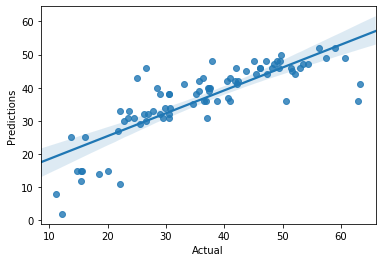

In [167]:
sns.regplot('Actual','Predictions', data=df)